In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

[dataset - cancer](https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset?resource=download)

In [ ]:
df = pd.read_csv('/Breast_cancer_data.csv')

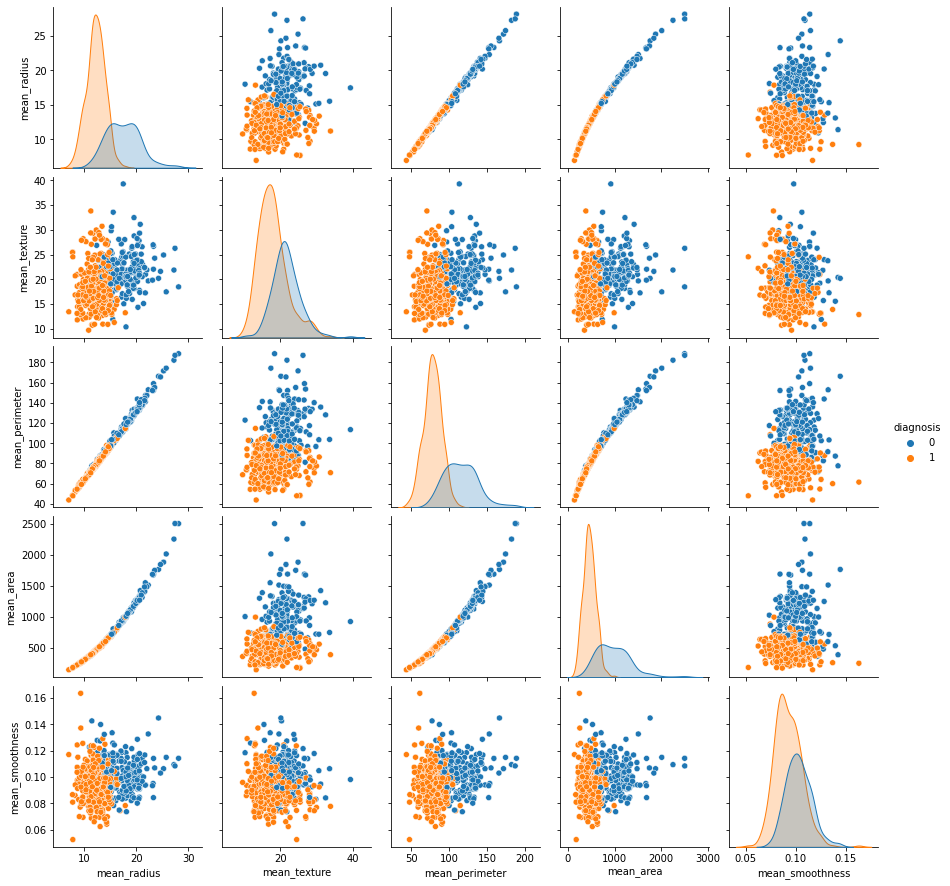

In [ ]:
sns.pairplot(df, hue='diagnosis', vars=df.columns.drop('diagnosis'))

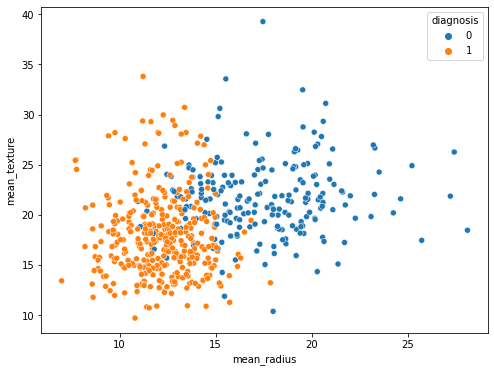

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'mean_radius', y = 'mean_texture', hue = 'diagnosis', data = df)

In [ ]:
x = df.drop('diagnosis', axis = 1).values
y = df['diagnosis'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

- Linear Kernel SVM

In [ ]:
from sklearn.svm import LinearSVC, SVC

In [ ]:
svm_linear = LinearSVC(loss = 'hinge', dual = True)
svm_linear.fit(x_train, y_train)

LinearSVC(loss='hinge')

In [ ]:
print('accuracy in the train: ', round(accuracy_score(y_train, svm_linear.predict(x_train)) * 100,2))
print('accuracy in the test: ', round(accuracy_score(y_test, svm_linear.predict(x_test)) * 100,2))

accuracy in the train:  91.78
accuracy in the test:  96.5


In [ ]:
#classification report in the test
print(classification_report(y_test, svm_linear.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        56
           1       0.97      0.98      0.97        87

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



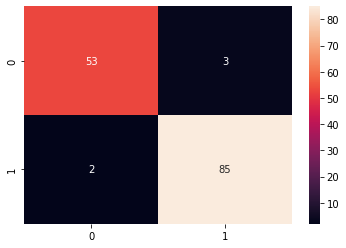

In [ ]:
sns.heatmap(confusion_matrix(y_test, svm_linear.predict(x_test)), annot = True)

- Radial Kernel SVM

In [ ]:
svm_rbf = SVC(kernel='rbf', C=15, gamma = 3)
svm_rbf.fit(x_train, y_train)

SVC(C=15, gamma=3)

In [ ]:
print('accuracy in the train: ', round(accuracy_score(y_train, svm_rbf.predict(x_train)) * 100,2))
print('accuracy in the test: ', round(accuracy_score(y_test, svm_rbf.predict(x_test)) * 100,2))

accuracy in the train:  98.59
accuracy in the test:  96.5


In [ ]:
#classification report in the test
print(classification_report(y_test, svm_rbf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        56
           1       0.97      0.98      0.97        87

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



- Polynomial Kernel SVM

In [ ]:
svm_polynomial = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
svm_polynomial.fit(x_train, y_train)

SVC(C=5, coef0=1, degree=2, gamma='auto', kernel='poly')

In [ ]:
print('accuracy in the train: ', round(accuracy_score(y_train, svm_polynomial.predict(x_train)) * 100,2))
print('accuracy in the test: ', round(accuracy_score(y_test, svm_polynomial.predict(x_test)) * 100,2))

accuracy in the train:  92.49
accuracy in the test:  97.2


In [ ]:
#classification report in the test
print(classification_report(y_test, svm_polynomial.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        56
           1       0.97      0.99      0.98        87

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



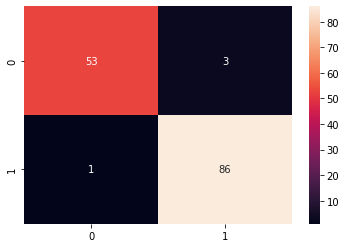

In [ ]:
sns.heatmap(confusion_matrix(y_test, svm_polynomial.predict(x_test)), annot = True)